In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs


In [2]:
# Load the heart disease dataset
df = pd.read_csv("heart_dataset.csv")

# Display the first 5 rows to check the data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Check Dataset Information
# Display basic dataset information (columns, data types, missing values)
df.info()

# Check for missing values in each column
print("Missing Values per Column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB
Missing Values per Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target 

In [7]:
# Display Dataset Shape
# Show the number of rows and columns
print(f"Dataset Shape: {df.shape}")  # (Rows, Columns)



Dataset Shape: (1888, 14)


In [11]:
#Summary Statistics
# Display statistical summary of numerical columns
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.279131,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.280877,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


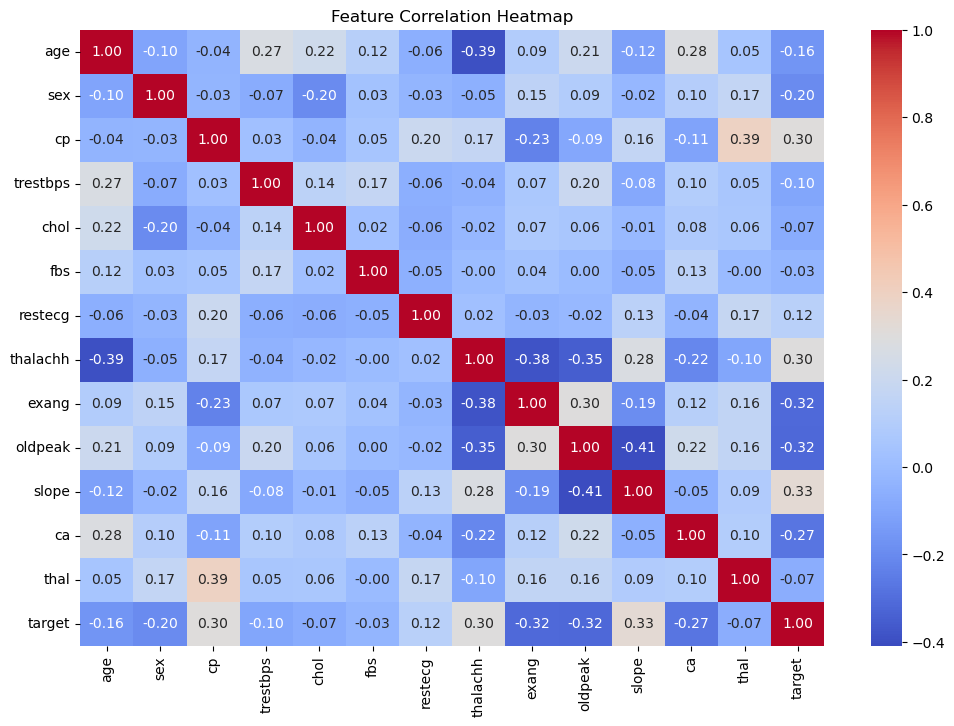

In [13]:
#  Check Feature Correlation (Heatmap)
# Plot a heatmap to visualize correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\paish\AppData\Local\Temp\ipykernel_80132\3200105483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="viridis")


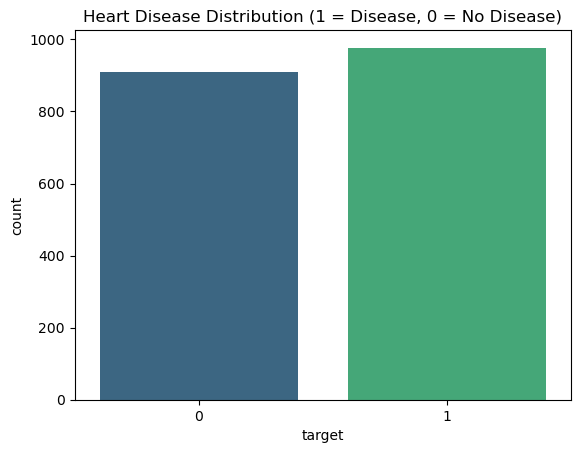

In [15]:
#Visualize Target Variable Distribution
# Plot the count of patients with and without heart disease
sns.countplot(x=df["target"], palette="viridis")
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()


In [17]:
# Define Features and Target Variable
# Define independent variables (features) and dependent variable (target)
X = df.drop(columns=["target"])  # Features (all except 'target')
y = df["target"]  # Target variable (1 = Disease, 0 = No Disease)


In [19]:
# Split Data into Training & Testing Sets
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")


Training Data Shape: (1510, 13), Testing Data Shape: (378, 13)


In [21]:
# Standardize the Features
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler to normalize feature values
scaler = StandardScaler()

# Fit on training data and transform both training & test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for easier analysis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [23]:
# Train Logistic Regression (Initial Model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression model with higher iterations
log_model = LogisticRegression(max_iter=1000)

# Train the model using the training dataset
log_model.fit(X_train_scaled, y_train)

# Make predictions on the test dataset
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate Logistic Regression Model Accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy * 100:.2f}%")


Logistic Regression Accuracy: 72.49%


In [26]:
# Optimize with Random Forest and Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define a parameter grid for Random Forest tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning (cross-validation = 5)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Print best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [28]:
# Train the Optimized Random Forest Model
# Train the Random Forest model with the best parameters found
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test dataset
y_pred_rf = best_rf_model.predict(X_test_scaled)


In [30]:
#  Evaluate Accuracy and Other Metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy of the optimized Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Calculate additional evaluation metrics
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print model evaluation results
print(f"Optimized Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Optimized Random Forest Accuracy: 95.77%
R² Score: 0.8307
Mean Absolute Error (MAE): 0.0423
Root Mean Squared Error (RMSE): 0.2057


In [32]:
# Save the Optimized Model Using Pickle
import pickle

# Save the trained Random Forest model
with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)

print("Optimized Random Forest Model saved successfully!")


Optimized Random Forest Model saved successfully!
